In [1]:
%%html
<style>
.dataframe td,.dataframe thead th { 
    note:'pandas表格属性';
    white-space: auto;
    text-align:left;
    border:1px solid;
    font-size:12px
}
.input_prompt{
    note:'隐藏cell左边的提示如 In[12]以便于截图';
#     display:none;
}
div.output_text {
    note:'输出内容的高度';
    max-height: 500px;
}
div.output_area img{
    note:'输出图片的宽度';
    max-width:100%
}
div.output_scroll{
    note:'禁用输出的阴影';
    box-shadow: none;
}
</style>
<h5>!!以上是作者为了排版而修改的排版效果，请注意是否需要使用!!</h5>

In [2]:
# 修改pandas默认的现实设置
import pandas as pd
pd.set_option('display.max_columns',10)  
pd.set_option('display.max_rows',20) 

<h1>模型验证及优化<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#模型验证及选择" data-toc-modified-id="模型验证及选择-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>模型验证及选择</a></span><ul class="toc-item"><li><span><a href="#整体说明及准备工作" data-toc-modified-id="整体说明及准备工作-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>整体说明及准备工作</a></span></li><li><span><a href="#评价指标及预测方式等" data-toc-modified-id="评价指标及预测方式等-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>评价指标及预测方式等</a></span></li><li><span><a href="#验证方式" data-toc-modified-id="验证方式-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>验证方式</a></span><ul class="toc-item"><li><span><a href="#简单交叉验证" data-toc-modified-id="简单交叉验证-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>简单交叉验证</a></span></li><li><span><a href="#K折交叉验证-K-fold-CV" data-toc-modified-id="K折交叉验证-K-fold-CV-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>K折交叉验证 K-fold CV</a></span></li><li><span><a href="#留P法-LPO-CV" data-toc-modified-id="留P法-LPO-CV-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>留P法 LPO CV</a></span></li><li><span><a href="#StratifiedKFold" data-toc-modified-id="StratifiedKFold-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>StratifiedKFold</a></span></li></ul></li><li><span><a href="#模型比较" data-toc-modified-id="模型比较-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>模型比较</a></span><ul class="toc-item"><li><span><a href="#线下评测分数" data-toc-modified-id="线下评测分数-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>线下评测分数</a></span></li><li><span><a href="#绘制学习曲线进行可视化分析" data-toc-modified-id="绘制学习曲线进行可视化分析-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>绘制学习曲线进行可视化分析</a></span></li></ul></li></ul></li><li><span><a href="#模型超参空间及调参" data-toc-modified-id="模型超参空间及调参-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>模型超参空间及调参</a></span><ul class="toc-item"><li><span><a href="#以随机森林为例介绍基本调用方法" data-toc-modified-id="以随机森林为例介绍基本调用方法-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>以随机森林为例介绍基本调用方法</a></span><ul class="toc-item"><li><span><a href="#穷举网格搜索" data-toc-modified-id="穷举网格搜索-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>穷举网格搜索</a></span></li><li><span><a href="#随机参数优化" data-toc-modified-id="随机参数优化-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>随机参数优化</a></span></li></ul></li><li><span><a href="#F3特征集和LightGBM-网格调参" data-toc-modified-id="F3特征集和LightGBM-网格调参-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>F3特征集和LightGBM 网格调参</a></span></li><li><span><a href="#绘制验证曲线" data-toc-modified-id="绘制验证曲线-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>绘制验证曲线</a></span></li></ul></li></ul></div>

# 模型验证及选择

## 整体说明及准备工作

按照：
评价指标
验证方式
学习曲线
结果分析，模型选择
模型调参
的步骤对模型进行选择，调优

In [3]:
from sklearn import metrics  
import numpy as np  
import pandas as pd
import datetime
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
#########部分SKLearn 集成的算法###############
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB 
#########SKLearn 集成的算法###############
import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline
############全局参数#################################
id_col_names=['user_id','coupon_id','date_received']
target_col_name='label'
id_target_cols=['user_id','coupon_id','date_received','label']
myeval='roc_auc'
#cvscore=0
############目录定义#################################
datapath = '../data/' 
featurepath = '../feature/' 
resultpath = '../result/'
tmppath = '../tmp/'
scorepath = '../score/'


In [4]:
###########工具函数#############################################
#返回ID列
def get_id_df(df):
    return df[id_col_names]


#返回Target列
def get_target_df(df):
    return df[target_col_name]


#返回特征列
def get_predictors_df(df):
    predictors = [f for f in df.columns if f not in id_target_cols]
    return df[predictors]


#按特征名读取训练集
def read_featurefile_train(featurename):
    df = pd.read_csv(featurepath + 'train_' + featurename + '.csv',
                     sep=',',
                     encoding="utf-8")
    df.fillna(0, inplace=True)
    return df


#按特征名读取测试集
def read_featurefile_test(featurename):
    df = pd.read_csv(featurepath + 'test_' + featurename + '.csv',
                     sep=',',
                     encoding="utf-8")
    df.fillna(0, inplace=True)
    return df


# 将特征归一化
def standize_df(train_data, test_data):
    from sklearn import preprocessing

    features_columns = [
        f for f in test_data.columns if f not in id_target_cols
    ]
    min_max_scaler = preprocessing.MinMaxScaler()
    min_max_scaler = min_max_scaler.fit(train_data[features_columns])

    train_data_scaler = min_max_scaler.transform(train_data[features_columns])
    test_data_scaler = min_max_scaler.transform(test_data[features_columns])

    train_data_scaler = pd.DataFrame(train_data_scaler)
    train_data_scaler.columns = features_columns

    test_data_scaler = pd.DataFrame(test_data_scaler)
    test_data_scaler.columns = features_columns

    train_data_scaler['label'] = train_data['label']
    train_data_scaler[id_col_names] = train_data[id_col_names]
    test_data_scaler[id_col_names] = test_data[id_col_names]
    return train_data_scaler, test_data_scaler


#按特征名读取数据
def read_data(featurename):
    traindf = read_featurefile_train(featurename)
    testdf = read_featurefile_test(featurename)
    #return traindf,testdf
    return standize_df(traindf, testdf)

In [5]:
#数据读取
#所有的特征都是上一节生成的
train_f1, test_f1 = read_data('f1')
#所有的特征都是上一节生成的
train_f2, test_f2 = read_data('sf2')
#所有的特征都是上一节生成的
train_f3, test_f3 = read_data('sf3')

## 评价指标及预测方式等

In [6]:
#性能评价函数
#本赛题目标是预测投放的优惠券是否核销。
#针对此任务及一些相关背景知识，使用优惠券核销预测的平均AUC（ROC曲线下面积）作为评价标准。
#即对每个优惠券coupon_id单独计算核销预测的AUC值，再对所有优惠券的AUC值求平均作为最终的评价标准。
# coupon平均auc计算
from sklearn.metrics import roc_auc_score


def myauc(test):
    testgroup = test.groupby(['coupon_id'])
    aucs = []
    for i in testgroup:
        coupon_df = i[1]
        #测算AUC必须大于1个类别
        if len(coupon_df['label'].unique()) < 2:
            continue
        auc = metrics.roc_auc_score(coupon_df['label'], coupon_df['pred'])
        aucs.append(auc)
    return np.average(aucs)

虽然赛题是按照coupon的AUC来计算。不过因为整体AUC（也就是用roc_auc_score 求出的结果）与Coupon AUC同增同减，所以在进行评估的时候可以直接使用整体AUC。

预测方式，因为要的结果是购买的几率，所以不能直接用Predict因为这样会直接返回0,1,而要用predict_proba，它会返回每个类别的可能行，取其中为1的列即可

## 验证方式

### 简单交叉验证

In [7]:
# 简单交叉验证F1

from sklearn.model_selection import train_test_split  # 切分数据
target = get_target_df(train_f1).copy()
traindf = train_f1.copy()
# 切分数据 训练数据80% 验证数据20%
train_all, test_all, train_target, test_target = train_test_split(
    traindf, target, test_size=0.2, random_state=0)

train_data = get_predictors_df(train_all).copy()
test_data = get_predictors_df(test_all).copy()

clf = LogisticRegression()
clf.fit(train_data, train_target)
train_pred = clf.predict_proba(train_data)[:, 1]
test_pred = clf.predict_proba(test_data)[:, 1]

score_train = roc_auc_score(train_target, train_pred)
score_test = roc_auc_score(test_target, test_pred)
print("LogisticRegression train 总体AUC:   ", score_train)
print("LogisticRegression test 总体AUC:   ", score_test)

train_all['pred'] = train_pred
test_all['pred'] = test_pred
print("LogisticRegression train Coupon AUC:   ", myauc(train_all))
print("LogisticRegression test Coupon AUC:   ", myauc(test_all))

LogisticRegression train 总体AUC:    0.6634424527048536
LogisticRegression test 总体AUC:    0.6674703678292377
LogisticRegression train Coupon AUC:    0.540286974067141
LogisticRegression test Coupon AUC:    0.5410440709758992


In [8]:
# 简单交叉验证 F3

from sklearn.model_selection import train_test_split  # 切分数据

target = get_target_df(train_f3).copy()
traindf = train_f3.copy()

# 切分数据 训练数据80% 验证数据20%
train_all, test_all, train_target, test_target = train_test_split(
    traindf, target, test_size=0.2, random_state=0)

train_data = get_predictors_df(train_all).copy()
test_data = get_predictors_df(test_all).copy()

clf = LogisticRegression()
clf.fit(train_data, train_target)
train_pred = clf.predict_proba(train_data)[:, 1]
test_pred = clf.predict_proba(test_data)[:, 1]

score_train = roc_auc_score(train_target, train_pred)
score_test = roc_auc_score(test_target, test_pred)
print("LogisticRegression train 总体AUC:   ", score_train)
print("LogisticRegression test 总体AUC:   ", score_test)

train_all['pred'] = train_pred
test_all['pred'] = test_pred
print("LogisticRegression train Coupon AUC:   ", myauc(train_all))
print("LogisticRegression test Coupon AUC:   ", myauc(test_all))

LogisticRegression train 总体AUC:    0.8401632612736963
LogisticRegression test 总体AUC:    0.8407963973598427
LogisticRegression train Coupon AUC:    0.7124120705235216
LogisticRegression test Coupon AUC:    0.7327117645422953


### K折交叉验证 K-fold CV

In [9]:
# 5折交叉验证
train = train_f3.copy()
target = get_target_df(train_f3).copy()

from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for k, (train_index, test_index) in enumerate(kf.split(train)):
    train_data, test_data, train_target, test_target = train.iloc[
        train_index], train.iloc[test_index], target[train_index], target[
            test_index]
    clf = LogisticRegression()
    clf.fit(get_predictors_df(train_data), train_target)

    train_pred = clf.predict_proba(get_predictors_df(train_data))[:, 1]
    test_pred = clf.predict_proba(get_predictors_df(test_data))[:, 1]
    score_train = roc_auc_score(train_target, train_pred)
    score_test = roc_auc_score(test_target, test_pred)
    train_data['pred'] = train_pred
    test_data['pred'] = test_pred
    print(k + 1, " 折", "LogisticRegression train 总体AUC:   ", score_train)
    print(k + 1, " 折", "LogisticRegression test 总体AUC:   ", score_test)
    print(k + 1, " 折", "LogisticRegression train Coupon AUC:   ",
          myauc(train_data))
    print(k + 1, " 折", "LogisticRegression test Coupon AUC:   ",
          myauc(test_data), '\n')

1  折 LogisticRegression train 总体AUC:    0.8331587411477548
1  折 LogisticRegression test 总体AUC:    0.8684165166166979
1  折 LogisticRegression train Coupon AUC:    0.7115502158661619
1  折 LogisticRegression test Coupon AUC:    0.7239951466590894 

2  折 LogisticRegression train 总体AUC:    0.8335549195186673
2  折 LogisticRegression test 总体AUC:    0.8652683000539335
2  折 LogisticRegression train Coupon AUC:    0.7143705158721593
2  折 LogisticRegression test Coupon AUC:    0.7147310370114887 

3  折 LogisticRegression train 总体AUC:    0.8445411734854178
3  折 LogisticRegression test 总体AUC:    0.8210357416287534
3  折 LogisticRegression train Coupon AUC:    0.7177615895085989
3  折 LogisticRegression test Coupon AUC:    0.7206336189190645 

4  折 LogisticRegression train 总体AUC:    0.8457626665332536
4  折 LogisticRegression test 总体AUC:    0.8172040524606592
4  折 LogisticRegression train Coupon AUC:    0.7098587244005776
4  折 LogisticRegression test Coupon AUC:    0.7407145414616322 

5  折 LogisticReg

### 留P法 LPO CV

In [10]:
train = train_f3.copy()
target = get_target_df(train_f3).copy()

from sklearn.model_selection import LeavePOut
lpo = LeavePOut(p=200)
num = 100
for k, (train_index, test_index) in enumerate(lpo.split(train)):
    train_data, test_data, train_target, test_target = train.iloc[
        train_index], train.iloc[test_index], target[train_index], target[
            test_index]
    clf = LogisticRegression()
    clf.fit(get_predictors_df(train_data), train_target)

    train_pred = clf.predict_proba(get_predictors_df(train_data))[:, 1]
    test_pred = clf.predict_proba(get_predictors_df(test_data))[:, 1]
    score_train = roc_auc_score(train_target, train_pred)
    score_test = roc_auc_score(test_target, test_pred)
    train_data['pred'] = train_pred
    test_data['pred'] = test_pred
    print(k + 1, " 折", "LogisticRegression train 总体AUC:   ", score_train)
    print(k + 1, " 折", "LogisticRegression test 总体AUC:   ", score_test)
    print(k + 1, " 折", "LogisticRegression train Coupon AUC:   ",
          myauc(train_data))
    print(k + 1, " 折", "LogisticRegression test Coupon AUC:   ",
          myauc(test_data), '\n')
    if k >= 5:
        break

1  折 LogisticRegression train 总体AUC:    0.8403689320302499
1  折 LogisticRegression test 总体AUC:    0.8783244680851063
1  折 LogisticRegression train Coupon AUC:    0.711733094863993
1  折 LogisticRegression test Coupon AUC:    0.6578947368421053 

2  折 LogisticRegression train 总体AUC:    0.8403752056024251
2  折 LogisticRegression test 总体AUC:    0.8783244680851063
2  折 LogisticRegression train Coupon AUC:    0.7116736866974863
2  折 LogisticRegression test Coupon AUC:    0.675 

3  折 LogisticRegression train 总体AUC:    0.840375304593119
3  折 LogisticRegression test 总体AUC:    0.8783244680851063
3  折 LogisticRegression train Coupon AUC:    0.7124268324697342
3  折 LogisticRegression test Coupon AUC:    0.6578947368421053 

4  折 LogisticRegression train 总体AUC:    0.8403767743094317
4  折 LogisticRegression test 总体AUC:    0.8783244680851063
4  折 LogisticRegression train Coupon AUC:    0.7124294197452108
4  折 LogisticRegression test Coupon AUC:    0.6578947368421053 

5  折 LogisticRegression train 总

### StratifiedKFold
通过比较发现还是StratifiedKFold比较适合本赛题。因为本赛题正负样本分布不均匀。而StratifiedKFold 分层采样交叉切分，确保训练集，测试集中各类别样本的比例与原始数据集中相同。

In [11]:
# 5折交叉验证
train = train_f3.copy()
target = get_target_df(train_f3).copy()

from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5)
for k, (train_index, test_index) in enumerate(kf.split(train, target)):
    train_data, test_data, train_target, test_target = train.iloc[
        train_index], train.iloc[test_index], target[train_index], target[
            test_index]
    clf = LogisticRegression()
    clf.fit(get_predictors_df(train_data), train_target)

    train_pred = clf.predict_proba(get_predictors_df(train_data))[:, 1]
    test_pred = clf.predict_proba(get_predictors_df(test_data))[:, 1]
    score_train = roc_auc_score(train_target, train_pred)
    score_test = roc_auc_score(test_target, test_pred)
    train_data['pred'] = train_pred
    test_data['pred'] = test_pred
    print(k + 1, " 折", "LogisticRegression train 总体AUC:   ", score_train)
    print(k + 1, " 折", "LogisticRegression test 总体AUC:   ", score_test)
    print(k + 1, " 折", "LogisticRegression train Coupon AUC:   ",
          myauc(train_data))
    print(k + 1, " 折", "LogisticRegression test Coupon AUC:   ",
          myauc(test_data), '\n')

1  折 LogisticRegression train 总体AUC:    0.8335672883670855
1  折 LogisticRegression test 总体AUC:    0.8665180570386886
1  折 LogisticRegression train Coupon AUC:    0.7144669664663063
1  折 LogisticRegression test Coupon AUC:    0.719460319253799 

2  折 LogisticRegression train 总体AUC:    0.8340413905539288
2  折 LogisticRegression test 总体AUC:    0.8667059995817261
2  折 LogisticRegression train Coupon AUC:    0.7112422291800881
2  折 LogisticRegression test Coupon AUC:    0.7274937066158953 

3  折 LogisticRegression train 总体AUC:    0.8438176760654955
3  折 LogisticRegression test 总体AUC:    0.8265719308545689
3  折 LogisticRegression train Coupon AUC:    0.7138094614638892
3  折 LogisticRegression test Coupon AUC:    0.7219695766522634 

4  折 LogisticRegression train 总体AUC:    0.8458785217849514
4  折 LogisticRegression test 总体AUC:    0.8162153381918147
4  折 LogisticRegression train Coupon AUC:    0.7128195497759101
4  折 LogisticRegression test Coupon AUC:    0.7409048621174605 

5  折 LogisticRegr

## 模型比较

### 线下评测分数
选定StratifiedKFold后我们可以直接用上面的方法对不同模型进行比对。也可以sklearn.model_selection.cross_val_score函数。它在cv是整数，而且目标是类别的时候也是用的StratifiedKFold。具体看：
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
不过本赛题因为评测指标是按Coupon的AUC，所以不能用它，要自己计算。

In [12]:
####################使用sklearn的统一代码框架##########################
#提供的函数包括：
#classifier_single(featurename,classifier,cvnum)
#按满减情况分别预测
#classifier_single_sep_fd(featurename,classifier,cvnum):
####################整合在sklearn的分类算法###############
def get_sklearn_model(model_name, param=None):
    #朴素贝叶斯
    if model_name == 'NB':
        model = MultinomialNB(alpha=0.01)
    #逻辑回归
    elif model_name == 'LR':
        model = LogisticRegression(penalty='l2')
    # KNN
    elif model_name == 'KNN':
        model = KNeighborsClassifier()
    #随机森林
    elif model_name == 'RF':
        model = RandomForestClassifier()
    #决策树
    elif model_name == 'DT':
        model = tree.DecisionTreeClassifier()
    #向量机
    elif model_name == 'SVC':
        model = SVC(kernel='rbf')
    #GBDT
    elif model_name == 'GBDT':
        model = GradientBoostingClassifier()
    #XGBoost
    elif model_name == 'XGB':
        model = XGBClassifier()
    #lightGBM
    elif model_name == 'LGB':
        model = LGBMClassifier()
    else:
        print("wrong model name!")
        return
    if param is not None:
        model.set_params(**param)
    return model


#对算法进行分析
def classifier_df_score(train_feat, classifier, cvnum, param=None):
    clf = get_sklearn_model(classifier, param)
    train = train_feat.copy()
    target = get_target_df(train_feat).copy()
    kf = StratifiedKFold(n_splits=cvnum)

    scores = []
    score_coupons = []
    for k, (train_index, test_index) in enumerate(kf.split(train, target)):
        train_data, test_data, train_target, test_target = train.iloc[
            train_index], train.iloc[test_index], target[train_index], target[
                test_index]
        clf.fit(get_predictors_df(train_data), train_target)
        train_pred = clf.predict_proba(get_predictors_df(train_data))[:, 1]
        test_pred = clf.predict_proba(get_predictors_df(test_data))[:, 1]

        score_test = roc_auc_score(test_target, test_pred)
        test_data['pred'] = test_pred
        score_coupon_test = myauc(test_data)

        scores.append(score_test)
        score_coupons.append(score_coupon_test)

    print(classifier + "总体AUC:", scores)
    print(classifier + "Coupon AUC:", score_coupons)

In [13]:
#f1特征
train = train_f1.copy()
train.head()

,discount_rate,distance,if_fd,full_value,reduction_value,label,user_id,coupon_id,date_received
0,0.812785,0.1,1.0,0.500000,0.20,0,1439408,11002,20160528
1,0.939117,0.0,1.0,0.066667,0.01,0,1439408,8591,20160613
2,0.939117,0.0,1.0,0.066667,0.01,0,1439408,8591,20160516
3,0.761035,0.0,1.0,0.100000,0.05,0,2029232,1532,20160530
4,0.939117,0.0,1.0,0.066667,0.01,0,2029232,12737,20160519


In [14]:
print('特征f1, 不同模型5折训练Score：')
classifier_df_score(train, 'NB', 5)
classifier_df_score(train, 'LR', 5)
classifier_df_score(train, 'RF', 5)
classifier_df_score(train, 'LGB', 5)

特征f1, 不同模型5折训练Score：
NB总体AUC: [0.6484443076650914, 0.653782946558422, 0.657432305119762, 0.650365868900341, 0.6633592555110361]
NBCoupon AUC: [0.5363634518948031, 0.5338224316610605, 0.533498393240069, 0.5415347391633621, 0.5384562409294064]
LR总体AUC: [0.6629734010151047, 0.6609443401627635, 0.664057866660277, 0.6626167442257056, 0.6708052117988299]
LRCoupon AUC: [0.5363634518948031, 0.5338224316610605, 0.533498393240069, 0.5415347391633621, 0.5384562409294064]
RF总体AUC: [0.6837299437187315, 0.684537761465094, 0.6841457780882024, 0.6816223966577881, 0.6870504059995632]
RFCoupon AUC: [0.5308996485051398, 0.5283769070557913, 0.5227865786073982, 0.5286266292875597, 0.5393767768279629]
LGB总体AUC: [0.6851859959693405, 0.685200258947734, 0.6857321947111865, 0.6829574074515359, 0.6888458641150075]
LGBCoupon AUC: [0.5332253932949081, 0.5264648698156732, 0.5269345156817808, 0.5323563904224374, 0.5405386626715268]


In [15]:
#f2特征
train = train_f2.copy()
train.head()

,discount_rate,distance,if_fd,full_value,reduction_value,...,user_merchant_common_buy_rate,label,user_id,coupon_id,date_received
0,0.863014,0.0,1.0,0.666667,0.20,...,0.0,0,1832624,7610,20160429
1,0.786910,1.0,1.0,0.666667,0.30,...,0.0,0,163606,5054,20160421
2,0.863014,0.2,1.0,0.666667,0.20,...,0.0,0,94107,7610,20160412
3,0.863014,1.0,1.0,0.666667,0.20,...,0.0,0,4061024,7610,20160426
4,0.761035,1.0,1.0,0.100000,0.05,...,0.0,0,4061024,9871,20160409


In [16]:
print('特征f2, 不同模型5折训练Score：')
classifier_df_score(train, 'NB', 5)
classifier_df_score(train, 'LR', 5)
classifier_df_score(train, 'RF', 5)
classifier_df_score(train, 'LGB', 5)

特征f2, 不同模型5折训练Score：
NB总体AUC: [0.8220931929754454, 0.804169363171415, 0.7472996479976531, 0.7364542468459478, 0.7399672403073105]
NBCoupon AUC: [0.6306880228045485, 0.6121314564824665, 0.6071659402447231, 0.6118855432357609, 0.6024926053240627]
LR总体AUC: [0.8381984449179252, 0.8335265022686658, 0.783696023164985, 0.7733779574887727, 0.775555137007464]
LRCoupon AUC: [0.631339626103777, 0.62207295911567, 0.6091744678282707, 0.6095061878447319, 0.6075648757381682]
RF总体AUC: [0.7315001913200931, 0.7293586076535182, 0.7220586780934544, 0.7409550217501144, 0.7521653769138598]
RFCoupon AUC: [0.5667008468421834, 0.5358543852476242, 0.5160386756446573, 0.5453530868789428, 0.5452087793654802]
LGB总体AUC: [0.8746736157221453, 0.8737063825688013, 0.8477064244732748, 0.8416921841594016, 0.8432967709983599]
LGBCoupon AUC: [0.6357018028553509, 0.5959257194770607, 0.6022173359609332, 0.6122837533831077, 0.6006187449588496]


In [17]:
#f3特征
train = train_f3.copy()
train.head()

,discount_rate,distance,if_fd,full_value,reduction_value,...,day_gap_after,label,user_id,coupon_id,date_received
0,0.863014,0.0,1.0,0.666667,0.20,...,0.0,0,1832624,7610,20160429
1,0.786910,1.0,1.0,0.666667,0.30,...,0.0,0,163606,5054,20160421
2,0.863014,0.2,1.0,0.666667,0.20,...,0.0,0,94107,7610,20160412
3,0.863014,1.0,1.0,0.666667,0.20,...,0.0,0,4061024,7610,20160426
4,0.761035,1.0,1.0,0.100000,0.05,...,0.0,0,4061024,9871,20160409


In [18]:
print('特征f3, 不同模型5折训练Score：')
classifier_df_score(train, 'NB', 5)
classifier_df_score(train, 'LR', 5)
classifier_df_score(train, 'RF', 5)
classifier_df_score(train, 'LGB', 5)

特征f3, 不同模型5折训练Score：
NB总体AUC: [0.8535552184389527, 0.8388599216672568, 0.7908156467731013, 0.7803335152248032, 0.7833362717513173]
NBCoupon AUC: [0.7131584312999717, 0.7056698780857392, 0.7067684841516864, 0.7134645015989857, 0.706570801743292]
LR总体AUC: [0.8665180570386886, 0.8667059995817261, 0.8265719308545689, 0.8162153381918147, 0.8166881287904217]
LRCoupon AUC: [0.719460319253799, 0.7274937066158953, 0.7219695766522634, 0.7409048621174605, 0.7306691003952328]
RF总体AUC: [0.8035009385032182, 0.8100947828984136, 0.8072825849919404, 0.8070838739897185, 0.813615123050509]
RFCoupon AUC: [0.6912068018166672, 0.66940476255624, 0.6806663628047865, 0.692414012178118, 0.6958338825600764]
LGB总体AUC: [0.9017063876540394, 0.9028474497847858, 0.8860489799298887, 0.8810605942191141, 0.8825448947499648]
LGBCoupon AUC: [0.7440798692234487, 0.741981950122888, 0.7474652592149504, 0.7642682296497904, 0.7628559092978145]


通过对比训练集上不同算法的运算结果可以发现，F1特征集因为特征比较少，有严重的欠拟合，所以所有算法的分数都比较低。
F2特征集通过滑窗增加统计特征，它的分数比f1有了飞跃性的提高，其实在现实的业务场景F2+LR已经是一个很常用的解决方案了。之所以在实际作业中更倾向逻辑回归而不是类似LightGBM的算法，是为了减少计算量。当然如果计算资源不是问题的话，LightGBM也是一个好选择

### 绘制学习曲线进行可视化分析

我们还可以通过绘制学习曲线，对训练的过程进行比较深入的了解。

In [19]:
#画学习曲线
def plot_learning_curve(estimator,
                        title,
                        X,
                        y,
                        ylim=None,
                        cv=None,
                        n_jobs=1,
                        train_sizes=[0.01, 0.02, 0.05, 0.1, 0.2, 0.3]):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        scoring=myeval,
        n_jobs=n_jobs,
        train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1,
                     color="g")
    plt.plot(train_sizes,
             train_scores_mean,
             'o-',
             color="r",
             label="Training score")
    plt.plot(train_sizes,
             test_scores_mean,
             'o-',
             color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return plt


#画算法的学习曲线,为加快画图速度，最多选20%数据
def plot_curve_single(traindf,
                      classifier,
                      cvnum,
                      train_sizes=[0.01, 0.02, 0.05, 0.1, 0.2, 0.3]):
    X = get_predictors_df(traindf)
    y = get_target_df(traindf)
    title = "learning curve of " + classifier + ", cv:" + str(cvnum)
    estimator = get_sklearn_model(classifier)  #建模
    plot_learning_curve(estimator,
                        title,
                        X,
                        y,
                        ylim=(0, 1.01),
                        cv=cvnum,
                        train_sizes=train_sizes)

**F1特征集**

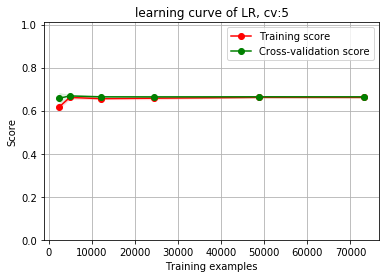

In [20]:
plot_curve_single(train_f1, 'LR', 5, [0.01, 0.02, 0.05, 0.1, 0.2, 0.3])

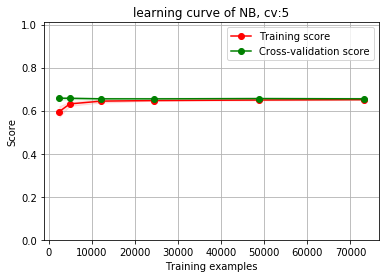

In [21]:
plot_curve_single(train_f1, 'NB', 5, [0.01, 0.02, 0.05, 0.1, 0.2, 0.3])

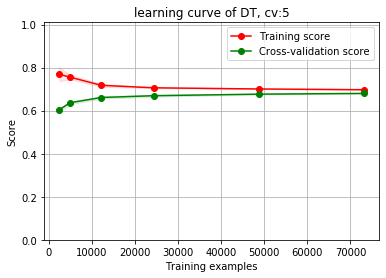

In [22]:
plot_curve_single(train_f1, 'DT', 5, [0.01, 0.02, 0.05, 0.1, 0.2, 0.3])

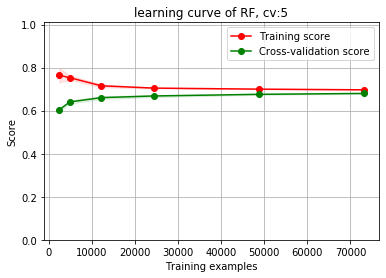

In [23]:
plot_curve_single(train_f1, 'RF', 5, [0.01, 0.02, 0.05, 0.1, 0.2, 0.3])

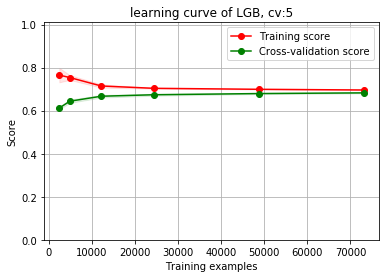

In [24]:
plot_curve_single(train_f1, 'LGB', 5, [0.01, 0.02, 0.05, 0.1, 0.2, 0.3])

**F2特征集**

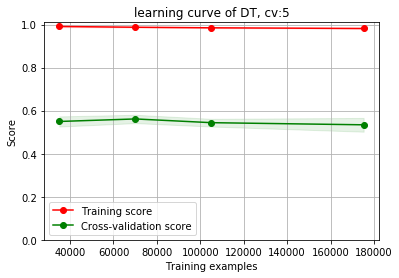

In [25]:
plot_curve_single(train_f2, 'DT', 5, [0.1, 0.2, 0.3, 0.5])

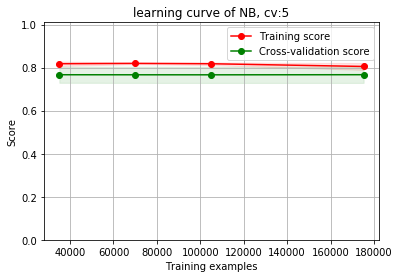

In [26]:
plot_curve_single(train_f2, 'NB', 5, [0.1, 0.2, 0.3, 0.5])

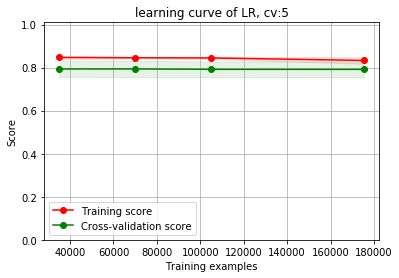

In [27]:
plot_curve_single(train_f2, 'LR', 5, [0.1, 0.2, 0.3, 0.5])

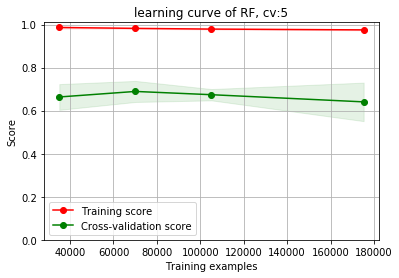

In [28]:
plot_curve_single(train_f2, 'RF', 5, [0.1, 0.2, 0.3, 0.5])

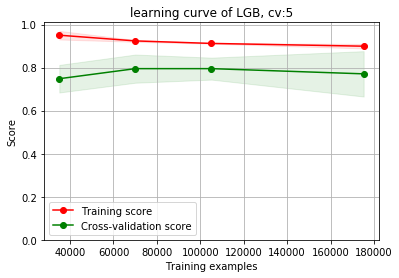

In [29]:
plot_curve_single(train_f2, 'LGB', 5, [0.1, 0.2, 0.3, 0.5])

**F3特征集**

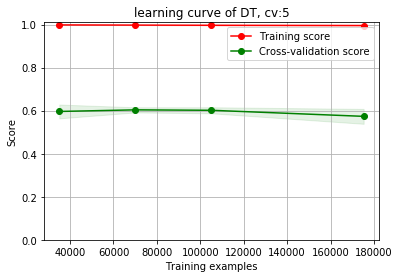

In [30]:
plot_curve_single(train_f3, 'DT', 5, [0.1, 0.2, 0.3, 0.5])

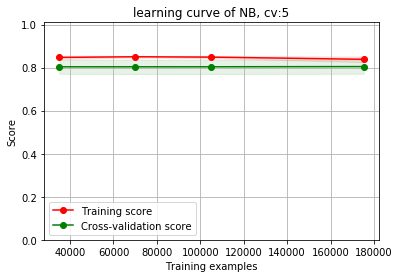

In [31]:
plot_curve_single(train_f3, 'NB', 5, [0.1, 0.2, 0.3, 0.5])

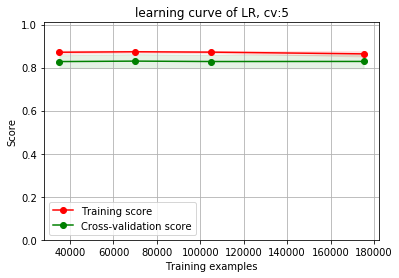

In [32]:
plot_curve_single(train_f3, 'LR', 5, [0.1, 0.2, 0.3, 0.5])

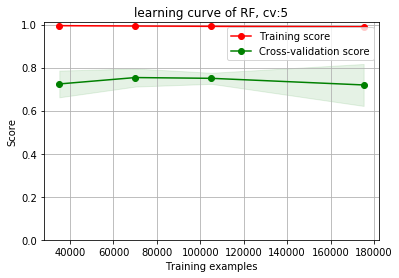

In [33]:
plot_curve_single(train_f3, 'RF', 5, [0.1, 0.2, 0.3, 0.5])

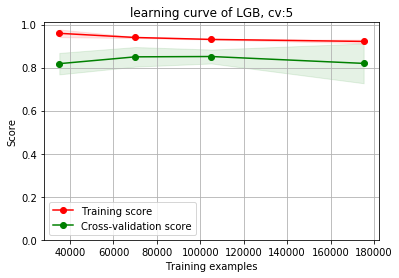

In [34]:
plot_curve_single(train_f3, 'LGB', 5, [0.1, 0.2, 0.3, 0.5])

可以发现在特征集f1上，评测分普遍比较低，是欠拟合。
在特征集f3上决策树和随机森林都表现出过拟合。LGB表现比较好。

# 模型超参空间及调参

In [35]:
#f3
train = get_predictors_df(train_f3)
target = get_target_df(train_f3)
train.head()

,discount_rate,distance,if_fd,full_value,reduction_value,...,this_month_user_receive_same_coupon_firstone,this_day_receive_all_coupon_count,this_day_user_receive_same_coupon_count,day_gap_before,day_gap_after
0,0.863014,0.0,1.0,0.666667,0.20,...,0.0,0.0,0.0,0.0,0.0
1,0.786910,1.0,1.0,0.666667,0.30,...,0.0,0.0,0.0,0.0,0.0
2,0.863014,0.2,1.0,0.666667,0.20,...,0.0,0.0,0.0,0.0,0.0
3,0.863014,1.0,1.0,0.666667,0.20,...,0.0,0.0,0.0,0.0,0.0
4,0.761035,1.0,1.0,0.100000,0.05,...,0.0,0.0,0.0,0.0,0.0


## 以随机森林为例介绍基本调用方法
### 穷举网格搜索

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split  # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data, test_data, train_target, test_target = train_test_split(
    train, target, test_size=0.2, random_state=0)

model = RandomForestClassifier()
parameters = {'n_estimators': [20, 50, 100], 'max_depth': [1, 2, 3]}

clf = GridSearchCV(model, parameters, cv=3, verbose=2)
clf.fit(train_data, train_target)

score_test = roc_auc_score(test_target, clf.predict(test_data))

print("RandomForestClassifier GridSearchCV test AUC:   ", score_test)
print("最优参数:")
print(clf.best_params_)
sorted(clf.cv_results_.keys())

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] max_depth=1, n_estimators=20 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=1, n_estimators=20, total=   1.5s
[CV] max_depth=1, n_estimators=20 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ..................... max_depth=1, n_estimators=20, total=   1.5s
[CV] max_depth=1, n_estimators=20 ....................................
[CV] ..................... max_depth=1, n_estimators=20, total=   1.4s
[CV] max_depth=1, n_estimators=50 ....................................
[CV] ..................... max_depth=1, n_estimators=50, total=   3.2s
[CV] max_depth=1, n_estimators=50 ....................................
[CV] ..................... max_depth=1, n_estimators=50, total=   3.2s
[CV] max_depth=1, n_estimators=50 ....................................
[CV] ..................... max_depth=1, n_estimators=50, total=   3.2s
[CV] max_depth=1, n_estimators=100 ...................................
[CV] .................... max_depth=1, n_estimators=100, total=   6.2s
[CV] max_depth=1, n_estimators=100 ...................................
[CV] .................... max_depth=1, n_estimators=100, total=   6.3s
[CV] max_depth=1, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  2.2min finished


RandomForestClassifier GridSearchCV test AUC:    0.5202805021949444
最优参数:
{'max_depth': 3, 'n_estimators': 20}


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

运行起来我们可以发现网格搜索很耗时间，每次训练及预测的次数是按照参数的个数指数增长的。所以一次不要搜索太多的参数，一般1，2个就可以了。

### 随机参数优化

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split  # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data, test_data, train_target, test_target = train_test_split(
    train, target, test_size=0.2, random_state=0)

model = RandomForestClassifier()
parameters = {'n_estimators': [10, 20, 30, 50], 'max_depth': [1, 2, 3]}

clf = RandomizedSearchCV(model, parameters, cv=3, verbose=2)
clf.fit(train_data, train_target)

score_test = roc_auc_score(test_target, clf.predict(test_data))

print("RandomForestClassifier RandomizedSearchCV test AUC:   ", score_test)
print("最优参数:")
print(clf.best_params_)
sorted(clf.cv_results_.keys())

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=20, max_depth=2 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... n_estimators=20, max_depth=2, total=   1.9s
[CV] n_estimators=20, max_depth=2 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ..................... n_estimators=20, max_depth=2, total=   1.9s
[CV] n_estimators=20, max_depth=2 ....................................
[CV] ..................... n_estimators=20, max_depth=2, total=   1.9s
[CV] n_estimators=10, max_depth=1 ....................................
[CV] ..................... n_estimators=10, max_depth=1, total=   0.8s
[CV] n_estimators=10, max_depth=1 ....................................
[CV] ..................... n_estimators=10, max_depth=1, total=   0.8s
[CV] n_estimators=10, max_depth=1 ....................................
[CV] ..................... n_estimators=10, max_depth=1, total=   0.8s
[CV] n_estimators=20, max_depth=3 ....................................
[CV] ..................... n_estimators=20, max_depth=3, total=   2.2s
[CV] n_estimators=20, max_depth=3 ....................................
[CV] ..................... n_estimators=20, max_depth=3, total=   2.3s
[CV] n_estimators=20, max_depth=3 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.3min finished


RandomForestClassifier RandomizedSearchCV test AUC:    0.5275905398159426
最优参数:
{'n_estimators': 10, 'max_depth': 3}


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

## F3特征集和LightGBM 网格调参

LightGBM 调参次序：  
第一步：学习率和迭代次数  
第二步：确定max_depth和num_leaves  
第三步：确定min_data_in_leaf和max_bin in  
第四步：确定feature_fraction、bagging_fraction、bagging_freq  
第五步：确定lambda_l1和lambda_l2  
第六步：确定 min_split_gain   
第七步：降低学习率，增加迭代次数，验证模型  

In [38]:
#f3特征
traindf = train_f3.copy()

#按日期分割，为了加快速度，只用了一般数据进行网格调参，正式的时候应该全用
train = traindf[traindf.date_received < 20160515]
test = traindf[traindf.date_received >= 20160515]

train_data = get_predictors_df(train).copy()
train_target = get_target_df(train).copy()
test_data = get_predictors_df(test).copy()
test_target = get_target_df(test).copy()

traindf.head()

,discount_rate,distance,if_fd,full_value,reduction_value,...,day_gap_after,label,user_id,coupon_id,date_received
0,0.863014,0.0,1.0,0.666667,0.20,...,0.0,0,1832624,7610,20160429
1,0.786910,1.0,1.0,0.666667,0.30,...,0.0,0,163606,5054,20160421
2,0.863014,0.2,1.0,0.666667,0.20,...,0.0,0,94107,7610,20160412
3,0.863014,1.0,1.0,0.666667,0.20,...,0.0,0,4061024,7610,20160426
4,0.761035,1.0,1.0,0.100000,0.05,...,0.0,0,4061024,9871,20160409


In [39]:
#第一步：学习率和迭代次数
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# 切分数据 训练数据80% 验证数据20%
# 为了加快速度CV选的3，其实一般用5
# 因为每训练一次耗时很多，所以每个参数的选项不多，间隔比较大，正式的时候应该是比较多，间隔比较细的
# 本次只是演示，所以如果最好参数位于区间的边缘也就直接用了，其实如果最好参数在边缘，需要重新再搜索。
model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       learning_rate=0.1,
                       max_depth=5,
                       bagging_fraction=0.8,
                       feature_fraction=0.8)
parameters = {'n_estimators': [100, 150, 175, 200, 225, 250]}

clf = GridSearchCV(model, parameters, cv=3, verbose=2)
clf.fit(train_data, train_target)
score_test = roc_auc_score(test_target, clf.predict_proba(test_data)[:, 1])

print("LightGBM GridSearchCV AUC Score:   ", score_test)
print("最优参数:")
print(clf.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. n_estimators=100, total=   2.1s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ................................. n_estimators=100, total=   2.1s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   2.4s
[CV] n_estimators=150 ................................................
[CV] ................................. n_estimators=150, total=   2.8s
[CV] n_estimators=150 ................................................
[CV] ................................. n_estimators=150, total=   2.9s
[CV] n_estimators=150 ................................................
[CV] ................................. n_estimators=150, total=   2.9s
[CV] n_estimators=175 ................................................
[CV] ................................. n_estimators=175, total=   2.9s
[CV] n_estimators=175 ................................................
[CV] ................................. n_estimators=175, total=   2.9s
[CV] n_estimators=175 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.0min finished


LightGBM GridSearchCV AUC Score:    0.8168762892373986
最优参数:
{'n_estimators': 250}


In [40]:
#第二步：确定max_depth和num_leaves
#n_estimators=200
model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       n_estimators=200,
                       learning_rate=0.1,
                       bagging_fraction=0.8,
                       feature_fraction=0.8)
parameters = {'max_depth': range(4, 8, 1), 'num_leaves': range(10, 150, 10)}
#parameters={'max_depth': range(4,8,2), 'num_leaves':range(10, 100, 20)}
clf = GridSearchCV(model, parameters, cv=3, verbose=2)
clf.fit(train_data, train_target)

score_test = roc_auc_score(test_target, clf.predict_proba(test_data)[:, 1])

print("LightGBM GridSearchCV AUC Score:   ", score_test)
print("最优参数:")
print(clf.best_params_)

Fitting 3 folds for each of 56 candidates, totalling 168 fits
[CV] max_depth=4, num_leaves=10 ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... max_depth=4, num_leaves=10, total=   2.8s
[CV] max_depth=4, num_leaves=10 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV] ....................... max_depth=4, num_leaves=10, total=   2.9s
[CV] max_depth=4, num_leaves=10 ......................................
[CV] ....................... max_depth=4, num_leaves=10, total=   3.6s
[CV] max_depth=4, num_leaves=20 ......................................
[CV] ....................... max_depth=4, num_leaves=20, total=   3.2s
[CV] max_depth=4, num_leaves=20 ......................................
[CV] ....................... max_depth=4, num_leaves=20, total=   2.9s
[CV] max_depth=4, num_leaves=20 ......................................
[CV] ....................... max_depth=4, num_leaves=20, total=   3.0s
[CV] max_depth=4, num_leaves=30 ......................................
[CV] ....................... max_depth=4, num_leaves=30, total=   3.0s
[CV] max_depth=4, num_leaves=30 ......................................
[CV] ....................... max_depth=4, num_leaves=30, total=   2.9s
[CV] max_depth=4, num_leaves=30 ......................................
[CV] .

[CV] ....................... max_depth=5, num_leaves=60, total=   3.4s
[CV] max_depth=5, num_leaves=70 ......................................
[CV] ....................... max_depth=5, num_leaves=70, total=   3.1s
[CV] max_depth=5, num_leaves=70 ......................................
[CV] ....................... max_depth=5, num_leaves=70, total=   3.4s
[CV] max_depth=5, num_leaves=70 ......................................
[CV] ....................... max_depth=5, num_leaves=70, total=   3.5s
[CV] max_depth=5, num_leaves=80 ......................................
[CV] ....................... max_depth=5, num_leaves=80, total=   3.3s
[CV] max_depth=5, num_leaves=80 ......................................
[CV] ....................... max_depth=5, num_leaves=80, total=   3.6s
[CV] max_depth=5, num_leaves=80 ......................................
[CV] ....................... max_depth=5, num_leaves=80, total=   3.6s
[CV] max_depth=5, num_leaves=90 ......................................
[CV] .

[CV] ...................... max_depth=6, num_leaves=120, total=   3.9s
[CV] max_depth=6, num_leaves=120 .....................................
[CV] ...................... max_depth=6, num_leaves=120, total=   3.6s
[CV] max_depth=6, num_leaves=120 .....................................
[CV] ...................... max_depth=6, num_leaves=120, total=   3.9s
[CV] max_depth=6, num_leaves=130 .....................................
[CV] ...................... max_depth=6, num_leaves=130, total=   3.8s
[CV] max_depth=6, num_leaves=130 .....................................
[CV] ...................... max_depth=6, num_leaves=130, total=   4.1s
[CV] max_depth=6, num_leaves=130 .....................................
[CV] ...................... max_depth=6, num_leaves=130, total=   3.8s
[CV] max_depth=6, num_leaves=140 .....................................
[CV] ...................... max_depth=6, num_leaves=140, total=   3.7s
[CV] max_depth=6, num_leaves=140 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:  9.9min finished


LightGBM GridSearchCV AUC Score:    0.81384315348191
最优参数:
{'max_depth': 7, 'num_leaves': 20}


根据结果取 max_depth=6, num_leaves=40 也都这么做。

In [41]:
#第三步：确定min_data_in_leaf和max_bin in
#已经确认内容：
#n_estimators=200
#{'max_depth': 6, 'num_leaves': 40}
model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       n_estimators=200,
                       max_depth=6,
                       num_leaves=40,
                       learning_rate=0.1,
                       bagging_fraction=0.8,
                       feature_fraction=0.8)

#parameters={'max_bin': range(100,500,50),'min_data_in_leaf':range(100,150,10)}
parameters = {
    'max_bin': range(100, 500, 100),
    'min_data_in_leaf': range(100, 150, 50)
}
#调高 verbose可以看到更多信息
clf = GridSearchCV(model, parameters, cv=3, verbose=3)
clf.fit(train_data, train_target)

score_test = roc_auc_score(test_target, clf.predict_proba(test_data)[:, 1])

print("LightGBM GridSearchCV AUC Score:   ", score_test)
print("最优参数:")
print(clf.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_bin=100, min_data_in_leaf=100 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... max_bin=100, min_data_in_leaf=100, score=0.953, total=   3.6s
[CV] max_bin=100, min_data_in_leaf=100 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] ... max_bin=100, min_data_in_leaf=100, score=0.951, total=   3.7s
[CV] max_bin=100, min_data_in_leaf=100 ...............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s


[CV] ... max_bin=100, min_data_in_leaf=100, score=0.952, total=   3.4s
[CV] max_bin=200, min_data_in_leaf=100 ...............................
[CV] ... max_bin=200, min_data_in_leaf=100, score=0.952, total=   3.4s
[CV] max_bin=200, min_data_in_leaf=100 ...............................
[CV] ... max_bin=200, min_data_in_leaf=100, score=0.951, total=   3.5s
[CV] max_bin=200, min_data_in_leaf=100 ...............................
[CV] ... max_bin=200, min_data_in_leaf=100, score=0.951, total=   3.4s
[CV] max_bin=300, min_data_in_leaf=100 ...............................
[CV] ... max_bin=300, min_data_in_leaf=100, score=0.952, total=   3.2s
[CV] max_bin=300, min_data_in_leaf=100 ...............................
[CV] ... max_bin=300, min_data_in_leaf=100, score=0.951, total=   3.3s
[CV] max_bin=300, min_data_in_leaf=100 ...............................
[CV] ... max_bin=300, min_data_in_leaf=100, score=0.952, total=   3.8s
[CV] max_bin=400, min_data_in_leaf=100 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   43.1s finished


LightGBM GridSearchCV AUC Score:    0.8158486756976501
最优参数:
{'max_bin': 400, 'min_data_in_leaf': 100}


In [42]:
#第四步：确定feature_fraction、bagging_fraction、bagging_freq
#已经确认内容：
#n_estimators=200
#{'max_depth': 6, 'num_leaves': 40}
#{'max_bin': 400, 'min_data_in_leaf': 120}
model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       n_estimators=200,
                       max_depth=6,
                       num_leaves=40,
                       max_bin=400,
                       min_data_in_leaf=120,
                       learning_rate=0.1,
                       bagging_fraction=0.8,
                       feature_fraction=0.8)

parameters = {
    'feature_fraction': [0.6, 0.7, 0.8, 0.9, 1.0],
    'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 1.0],
    'bagging_freq': range(0, 10, 2)
}

#调高 verbose可以看到更多信息
clf = GridSearchCV(model, parameters, cv=3, verbose=3)
clf.fit(train_data, train_target)

score_test = roc_auc_score(test_target, clf.predict_proba(test_data)[:, 1])

print("LightGBM GridSearchCV AUC Score:   ", score_test)
print("最优参数:")
print(clf.best_params_)

Fitting 3 folds for each of 125 candidates, totalling 375 fits
[CV] bagging_fraction=0.6, bagging_freq=0, feature_fraction=0.6 ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bagging_fraction=0.6, bagging_freq=0, feature_fraction=0.6, score=0.953, total=   3.3s
[CV] bagging_fraction=0.6, bagging_freq=0, feature_fraction=0.6 ......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  bagging_fraction=0.6, bagging_freq=0, feature_fraction=0.6, score=0.951, total=   3.5s
[CV] bagging_fraction=0.6, bagging_freq=0, feature_fraction=0.6 ......


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


[CV]  bagging_fraction=0.6, bagging_freq=0, feature_fraction=0.6, score=0.952, total=   3.1s
[CV] bagging_fraction=0.6, bagging_freq=0, feature_fraction=0.7 ......
[CV]  bagging_fraction=0.6, bagging_freq=0, feature_fraction=0.7, score=0.953, total=   3.4s
[CV] bagging_fraction=0.6, bagging_freq=0, feature_fraction=0.7 ......
[CV]  bagging_fraction=0.6, bagging_freq=0, feature_fraction=0.7, score=0.951, total=   3.4s
[CV] bagging_fraction=0.6, bagging_freq=0, feature_fraction=0.7 ......
[CV]  bagging_fraction=0.6, bagging_freq=0, feature_fraction=0.7, score=0.952, total=   3.6s
[CV] bagging_fraction=0.6, bagging_freq=0, feature_fraction=0.8 ......
[CV]  bagging_fraction=0.6, bagging_freq=0, feature_fraction=0.8, score=0.953, total=   3.6s
[CV] bagging_fraction=0.6, bagging_freq=0, feature_fraction=0.8 ......
[CV]  bagging_fraction=0.6, bagging_freq=0, feature_fraction=0.8, score=0.950, total=   4.0s
[CV] bagging_fraction=0.6, bagging_freq=0, feature_fraction=0.8 ......
[CV]  bagging_fr

[CV]  bagging_fraction=0.6, bagging_freq=6, feature_fraction=0.8, score=0.951, total=   4.3s
[CV] bagging_fraction=0.6, bagging_freq=6, feature_fraction=0.8 ......
[CV]  bagging_fraction=0.6, bagging_freq=6, feature_fraction=0.8, score=0.951, total=   4.2s
[CV] bagging_fraction=0.6, bagging_freq=6, feature_fraction=0.9 ......
[CV]  bagging_fraction=0.6, bagging_freq=6, feature_fraction=0.9, score=0.952, total=   4.1s
[CV] bagging_fraction=0.6, bagging_freq=6, feature_fraction=0.9 ......
[CV]  bagging_fraction=0.6, bagging_freq=6, feature_fraction=0.9, score=0.950, total=   4.1s
[CV] bagging_fraction=0.6, bagging_freq=6, feature_fraction=0.9 ......
[CV]  bagging_fraction=0.6, bagging_freq=6, feature_fraction=0.9, score=0.951, total=   4.0s
[CV] bagging_fraction=0.6, bagging_freq=6, feature_fraction=1.0 ......
[CV]  bagging_fraction=0.6, bagging_freq=6, feature_fraction=1.0, score=0.953, total=   3.9s
[CV] bagging_fraction=0.6, bagging_freq=6, feature_fraction=1.0 ......
[CV]  bagging_fr

[CV]  bagging_fraction=0.7, bagging_freq=2, feature_fraction=1.0, score=0.953, total=   4.4s
[CV] bagging_fraction=0.7, bagging_freq=2, feature_fraction=1.0 ......
[CV]  bagging_fraction=0.7, bagging_freq=2, feature_fraction=1.0, score=0.951, total=   4.2s
[CV] bagging_fraction=0.7, bagging_freq=2, feature_fraction=1.0 ......
[CV]  bagging_fraction=0.7, bagging_freq=2, feature_fraction=1.0, score=0.951, total=   4.2s
[CV] bagging_fraction=0.7, bagging_freq=4, feature_fraction=0.6 ......
[CV]  bagging_fraction=0.7, bagging_freq=4, feature_fraction=0.6, score=0.953, total=   3.5s
[CV] bagging_fraction=0.7, bagging_freq=4, feature_fraction=0.6 ......
[CV]  bagging_fraction=0.7, bagging_freq=4, feature_fraction=0.6, score=0.951, total=   3.6s
[CV] bagging_fraction=0.7, bagging_freq=4, feature_fraction=0.6 ......
[CV]  bagging_fraction=0.7, bagging_freq=4, feature_fraction=0.6, score=0.951, total=   3.5s
[CV] bagging_fraction=0.7, bagging_freq=4, feature_fraction=0.7 ......
[CV]  bagging_fr

[CV]  bagging_fraction=0.8, bagging_freq=0, feature_fraction=0.6, score=0.952, total=   3.9s
[CV] bagging_fraction=0.8, bagging_freq=0, feature_fraction=0.7 ......
[CV]  bagging_fraction=0.8, bagging_freq=0, feature_fraction=0.7, score=0.953, total=   3.3s
[CV] bagging_fraction=0.8, bagging_freq=0, feature_fraction=0.7 ......
[CV]  bagging_fraction=0.8, bagging_freq=0, feature_fraction=0.7, score=0.951, total=   3.7s
[CV] bagging_fraction=0.8, bagging_freq=0, feature_fraction=0.7 ......
[CV]  bagging_fraction=0.8, bagging_freq=0, feature_fraction=0.7, score=0.952, total=   3.5s
[CV] bagging_fraction=0.8, bagging_freq=0, feature_fraction=0.8 ......
[CV]  bagging_fraction=0.8, bagging_freq=0, feature_fraction=0.8, score=0.953, total=   3.4s
[CV] bagging_fraction=0.8, bagging_freq=0, feature_fraction=0.8 ......
[CV]  bagging_fraction=0.8, bagging_freq=0, feature_fraction=0.8, score=0.950, total=   3.8s
[CV] bagging_fraction=0.8, bagging_freq=0, feature_fraction=0.8 ......
[CV]  bagging_fr

KeyboardInterrupt: 

In [ ]:
#第五步：确定lambda_l1和lambda_l2
#已经确认内容：
#n_estimators=200
#{'max_depth': 6, 'num_leaves': 40}
#{'max_bin': 400, 'min_data_in_leaf': 120}
#{'bagging_fraction': 0.9, 'bagging_freq': 4, 'feature_fraction': 0.6}
model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       n_estimators=200,
                       max_depth=6,
                       num_leaves=40,
                       max_bin=400,
                       min_data_in_leaf=120,
                       learning_rate=0.1,
                       bagging_freq=4,
                       bagging_fraction=0.9,
                       feature_fraction=0.6)

parameters = {
    'lambda_l1': [1e-5, 1e-3, 1e-1, 0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
    'lambda_l2': [1e-5, 1e-3, 1e-1, 0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

#调高 verbose可以看到更多信息
clf = GridSearchCV(model, parameters, cv=3, verbose=3)
clf.fit(train_data, train_target)

score_test = roc_auc_score(test_target, clf.predict_proba(test_data)[:, 1])

print("LightGBM GridSearchCV AUC Score:   ", score_test)
print("最优参数:")
print(clf.best_params_)

In [ ]:
#第六步：确定 min_split_gain
#已经确认内容：
#n_estimators=200
#{'max_depth': 6, 'num_leaves': 40}
#{'max_bin': 400, 'min_data_in_leaf': 120}
#{'bagging_fraction': 0.9, 'bagging_freq': 4, 'feature_fraction': 0.6}
#{'lambda_l1': 1e-05, 'lambda_l2': 1e-05}
model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       n_estimators=200,
                       max_depth=6,
                       num_leaves=40,
                       max_bin=400,
                       min_data_in_leaf=120,
                       learning_rate=0.1,
                       lambda_l1=1e-05,
                       lambda_l2=1e-05,
                       bagging_freq=4,
                       bagging_fraction=0.9,
                       feature_fraction=0.6)

parameters = {
    'min_split_gain': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

#调高 verbose可以看到更多信息
clf = GridSearchCV(model, parameters, cv=3, verbose=3)
clf.fit(train_data, train_target)

score_test = roc_auc_score(test_target, clf.predict_proba(test_data)[:, 1])

print("LightGBM GridSearchCV AUC Score:   ", score_test)
print("最优参数:")
print(clf.best_params_)

In [ ]:
# 第七步：降低学习率，增加迭代次数，验证模型
#已经确认内容：
#n_estimators=200
#{'max_depth': 6, 'num_leaves': 40}
#{'max_bin': 400, 'min_data_in_leaf': 120}
#{'bagging_fraction': 0.9, 'bagging_freq': 4, 'feature_fraction': 0.6}
#{'lambda_l1': 1e-05, 'lambda_l2': 1e-05}
#{'min_split_gain': 0.0}
model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       n_estimators=200,
                       max_depth=6,
                       num_leaves=40,
                       max_bin=400,
                       min_data_in_leaf=120,
                       learning_rate=0.1,
                       lambda_l1=1e-05,
                       lambda_l2=1e-05,
                       min_split_gain=0.0,
                       bagging_freq=4,
                       bagging_fraction=0.9,
                       feature_fraction=0.6)

model.fit(train_data, train_target)
score_test = roc_auc_score(test_target, model.predict_proba(test_data)[:, 1])

print("LightGBM learning rate 0.1 AUC Score:   ", score_test)

model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       n_estimators=200,
                       max_depth=6,
                       num_leaves=40,
                       max_bin=400,
                       min_data_in_leaf=120,
                       learning_rate=0.05,
                       lambda_l1=1e-05,
                       lambda_l2=1e-05,
                       min_split_gain=0.0,
                       bagging_freq=4,
                       bagging_fraction=0.9,
                       feature_fraction=0.6)

model.fit(train_data, train_target)
score_test = roc_auc_score(test_target, model.predict_proba(test_data)[:, 1])

print("LightGBM learning rate 0.05 AUC Score:   ", score_test)

model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       n_estimators=200,
                       max_depth=6,
                       num_leaves=40,
                       max_bin=400,
                       min_data_in_leaf=120,
                       learning_rate=0.01,
                       lambda_l1=1e-05,
                       lambda_l2=1e-05,
                       min_split_gain=0.0,
                       bagging_freq=4,
                       bagging_fraction=0.9,
                       feature_fraction=0.6)

model.fit(train_data, train_target)
score_test = roc_auc_score(test_target, model.predict_proba(test_data)[:, 1])

print("LightGBM learning rate 0.01 AUC Score:   ", score_test)

model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       n_estimators=200,
                       max_depth=6,
                       num_leaves=40,
                       max_bin=400,
                       min_data_in_leaf=120,
                       learning_rate=0.005,
                       lambda_l1=1e-05,
                       lambda_l2=1e-05,
                       min_split_gain=0.0,
                       bagging_freq=4,
                       bagging_fraction=0.9,
                       feature_fraction=0.6)

model.fit(train_data, train_target)
score_test = roc_auc_score(test_target, model.predict_proba(test_data)[:, 1])

print("LightGBM learning rate 0.005 AUC Score:   ", score_test)

In [ ]:
model = LGBMClassifier()

model.fit(train_data, train_target)
score_test = roc_auc_score(test_target, model.predict_proba(test_data)[:, 1])

print("默认参数 AUC Score:   ", score_test)

最优参数
model = LGBMClassifier(boosting_type='gbdt',objective='binary',metrics='auc',n_estimators=200,max_depth=6,num_leaves=40,  
                        max_bin=400,min_data_in_leaf=120,  
                        learning_rate=0.05,   
                       lambda_l1=1e-05,lambda_l2=1e-05,min_split_gain=0.0,  
                        bagging_freq=4, bagging_fraction = 0.9,feature_fraction = 0.6)  


In [43]:
#f3特征
train = train_f3.copy()
train.head()
print('默认参数')
classifier_df_score(train, 'LGB', 5)
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'eval_metric': 'auc',
    'n_estimators': 200,
    'max_depth': 5,
    'num_leaves': 40,
    'max_bin': 400,
    'min_data_in_leaf': 120,
    'learning_rate': 0.1,
    'lambda_l1': 1e-05,
    'lambda_l2': 1e-05,
    'min_split_gain': 0.0,
    'bagging_freq': 4,
    'bagging_fraction': 0.9,
    'feature_fraction': 0.6,
    'seed': 1024,
    'n_thread': 12
}
print('调参后')
classifier_df_score(train, 'LGB', 5, params)

默认参数
LGB总体AUC: [0.9017063876540394, 0.9028474497847858, 0.8860489799298887, 0.8810605942191141, 0.8825448947499648]
LGBCoupon AUC: [0.7440798692234487, 0.741981950122888, 0.7474652592149504, 0.7642682296497904, 0.7628559092978145]
调参后
LGB总体AUC: [0.9025855554052864, 0.9043496920648407, 0.8861875013967577, 0.8820594188479879, 0.883635213451176]
LGBCoupon AUC: [0.7441512385391114, 0.7432384282827527, 0.7463287384907189, 0.7663217891405024, 0.7620611110529001]


对比发现调参后的结果比默认参数有所提高，不过不是高很多，比不上特征对结果的影响。而且因为调参只能再测试集上作，有的时候调参造成过拟，调参后线上成绩可能反而会下降。所以调参一般都是在比赛后期再做，前期主要是特征和模型的选择。

## 绘制验证曲线

可以通过绘制验证曲线，可视化的了解调参的过程。

In [44]:
#对进行网格调参
def grid_plot(train_feat,
              classifier,
              cvnum,
              param_range,
              param_name,
              param=None):
    from sklearn.model_selection import validation_curve
    train_scores, test_scores = validation_curve(get_sklearn_model(
        classifier, param),
                                                 get_predictors_df(train_feat),
                                                 get_target_df(train_feat),
                                                 param_name=param_name,
                                                 param_range=param_range,
                                                 cv=cvnum,
                                                 scoring='roc_auc',
                                                 n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with " + param_name)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.semilogx(param_range,
                 train_scores_mean,
                 label="Training score",
                 color="r")
    plt.fill_between(param_range,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.2,
                     color="r")
    plt.semilogx(param_range,
                 test_scores_mean,
                 label="Cross-validation score",
                 color="g")
    plt.fill_between(param_range,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.2,
                     color="g")
    plt.legend(loc="best")
    plt.show()

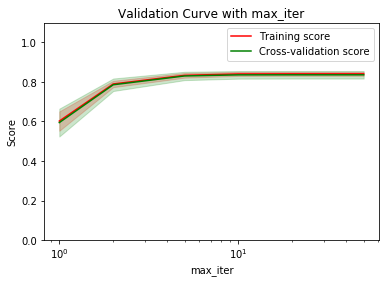

In [45]:
#对逻辑回归的max_iter情况进行查看
train_feat = train_f3.copy()
#grid_plot(train_feat,classifier,3,[10,20,40,80,200,400,800],'n_estimators',param=params)
grid_plot(train_feat,
          'LR',
          3, [1, 2, 5, 10, 20, 40, 50],
          'max_iter',
          param=None)

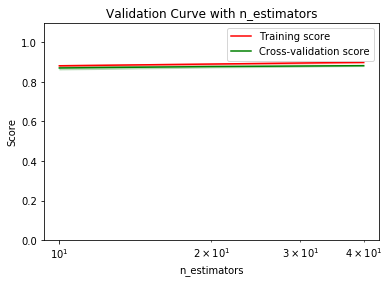

In [46]:
params = {
    'learning_rate': 0.1,
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'sub_feature': 0.6,
    'num_leaves': 50,
    'bagging_fraction': 0.8,
    'feature_fraction': 0.8
}
train_feat = train_f3.copy()
#grid_plot(train_feat,classifier,3,[10,20,40,80,200,400,800],'n_estimators',param=params)
grid_plot(train_feat, 'LGB', 3, [10, 20, 40], 'n_estimators', param=params)

In [47]:
params = {
    'learning_rate': 0.1,
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 10
}
train_feat = train_f3.copy()
#grid_plot(train_feat,classifier,3,[10,20,40,80,200,400,800],'n_estimators',param=params)
grid_plot(train_feat,
          'LGB',
          3, [0.1, 0.2, 0.5, 0.7, 0.8],
          'colsample_bytree',
          param=params)

KeyboardInterrupt: 